<a href="https://colab.research.google.com/github/GuiIfsp/ProjetoDadospt2/blob/main/ProjetoDadosSupermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Avalia√ß√£o dos Modelos de Classifica√ß√£o

Treinando e Avaliando: K-NN 
Acur√°cia : 0.9323
Precis√£o : 0.9461
Recall   : 0.9727
F1-Score : 0.9592
Matriz de Confus√£o:
 [[ 411  136]
 [  67 2385]]


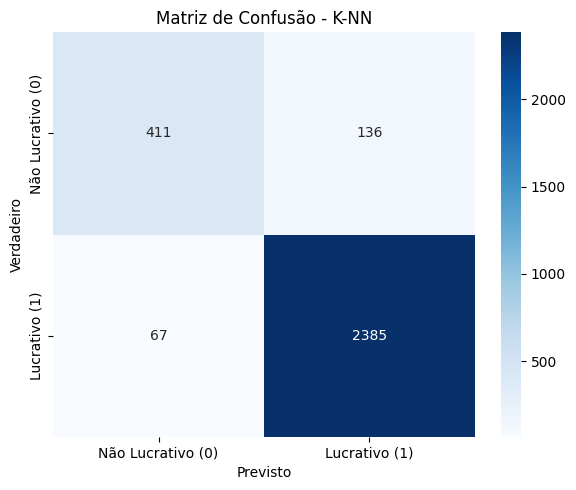


Treinando e Avaliando: SVM 
Acur√°cia : 0.9373
Precis√£o : 0.9506
Recall   : 0.9739
F1-Score : 0.9621
Matriz de Confus√£o:
 [[ 423  124]
 [  64 2388]]


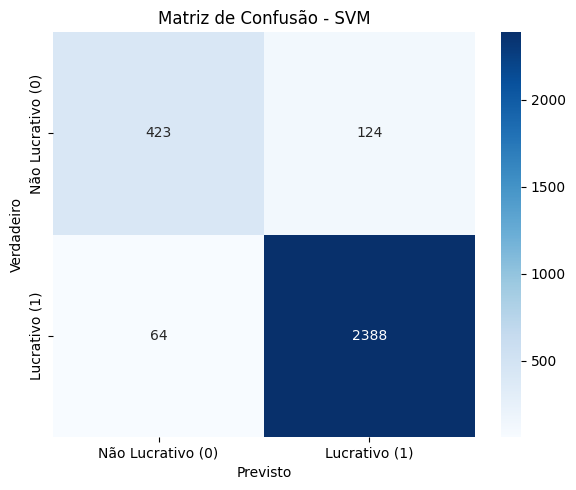


Treinando e Avaliando: √Årvore de Decis√£o 
Acur√°cia : 0.9450
Precis√£o : 0.9448
Recall   : 0.9906
F1-Score : 0.9672
Matriz de Confus√£o:
 [[ 405  142]
 [  23 2429]]


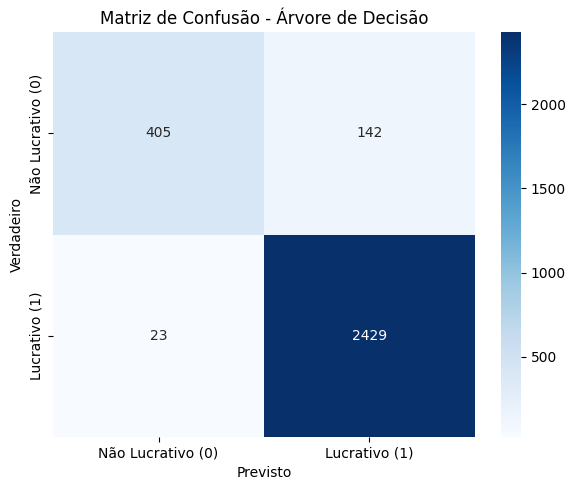


Treinando e Avaliando: Random Forest 
Acur√°cia : 0.9436
Precis√£o : 0.9412
Recall   : 0.9931
F1-Score : 0.9665
Matriz de Confus√£o:
 [[ 395  152]
 [  17 2435]]


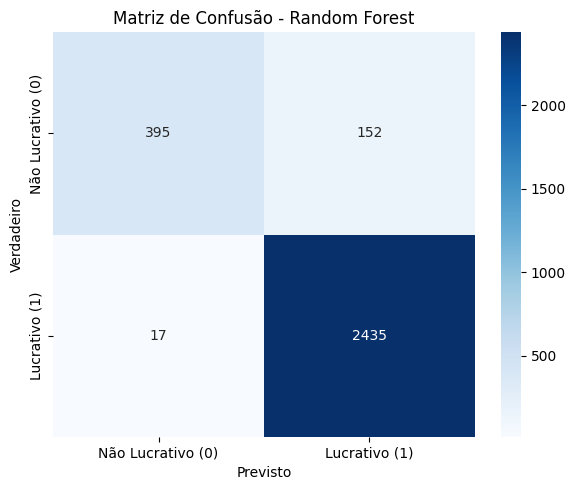


Treinando e Avaliando: Regress√£o Log√≠stica 
Acur√°cia : 0.9366
Precis√£o : 0.9546
Recall   : 0.9686
F1-Score : 0.9615
Matriz de Confus√£o:
 [[ 434  113]
 [  77 2375]]


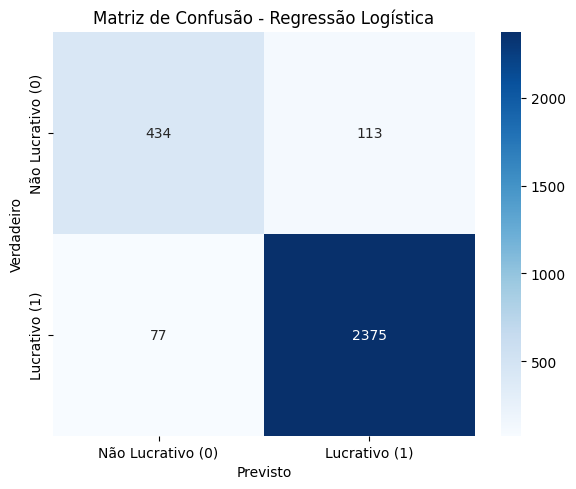

In [ ]:
# Importa√ß√£o de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from google.colab import drive

# Montar o Google Drive para acessar o arquivo
drive.mount('/content/drive')

# Carregar o dataset (usando encoding latin1 por causa de erro de acentua√ß√£o)
file_path = '/content/drive/MyDrive/01_supermercados.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Criar vari√°vel alvo bin√°ria: 1 se o lucro foi positivo, 0 caso contr√°rio
df['Profit_Positive'] = (df['Profit'] > 0).astype(int)

# Remover colunas irrelevantes para o modelo
X = df.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID',
             'Product Name', 'Profit', 'Profit_Positive', 'Order Date', 'Ship Date', 'Postal Code'], axis=1)

# Definir vari√°vel alvo
y_clf = df['Profit_Positive']

# Dividir dataset em treino e teste (70% treino, 30% teste)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.3, random_state=42)

# Separar nomes de colunas num√©ricas e categ√≥ricas
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Definir transforma√ß√µes: padronizar num√©ricas, one-hot em categ√≥ricas
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Criar pr√©-processador que aplica as transforma√ß√µes certas em cada tipo de coluna
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Aplicar transforma√ß√µes: fit_transform no treino e transform no teste
X_train_processed = preprocessor.fit_transform(X_clf_train)
X_test_processed = preprocessor.transform(X_clf_test)

# Nomes das classes para exibir na matriz de confus√£o
class_names = ['N√£o Lucrativo (0)', 'Lucrativo (1)']

# Definir modelos de classifica√ß√£o
modelos = {
    "K-NN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(C=1, kernel='rbf', random_state=42),
    "√Årvore de Decis√£o": DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=20, min_samples_leaf=1, n_estimators=100, random_state=42),
    "Regress√£o Log√≠stica": LogisticRegression(solver='liblinear', random_state=42, max_iter=200)
}

# Avaliar cada modelo e armazenar m√©tricas
resultados_classificacao = {}

print("Avalia√ß√£o dos Modelos de Classifica√ß√£o")
for nome, modelo in modelos.items():
    print(f"\nTreinando e Avaliando: {nome} ")
    modelo.fit(X_train_processed, y_clf_train)
    y_pred = modelo.predict(X_test_processed)

    # Calcular m√©tricas
    acc = accuracy_score(y_clf_test, y_pred)
    prec = precision_score(y_clf_test, y_pred, average='binary', zero_division=0)
    rec = recall_score(y_clf_test, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_clf_test, y_pred, average='binary', zero_division=0)
    cm = confusion_matrix(y_clf_test, y_pred)

    # Guardar resultados
    resultados_classificacao[nome] = {
        "Acur√°cia": acc,
        "Precis√£o": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Matriz de Confus√£o": cm
    }

    # Mostrar m√©tricas
    print(f"Acur√°cia : {acc:.4f}")
    print(f"Precis√£o : {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print("Matriz de Confus√£o:\n", cm)

    # Plotar matriz de confus√£o
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confus√£o - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()


Regress√£o Linear - RMSE: 236.44
SVR - RMSE: 230.67
√Årvore de Regress√£o - RMSE: 184.57
Random Forest - RMSE: 204.88


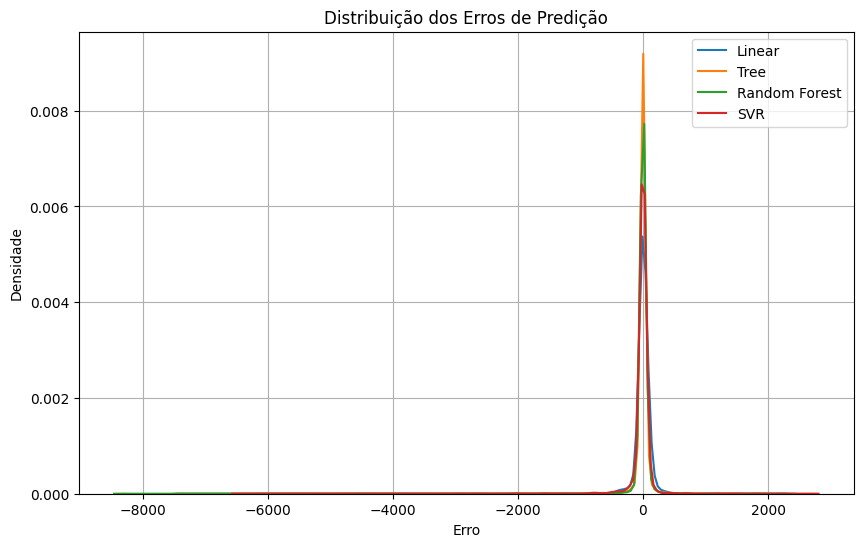

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Definir vari√°vel alvo: prever 'Profit'
y_reg = df['Profit']

# Usar as mesmas features (X) que j√° est√£o pr√©-processadas (X_clf_train, X_clf_test)
# Obs: se quiser usar o mesmo pipeline, pode reaproveitar o preprocessor:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X, y_reg, test_size=0.3, random_state=42
)

# Pr√©-processar dados num√©ricos e categ√≥ricos como foi feito antes
X_train_reg_processed = preprocessor.fit_transform(X_reg_train)
X_test_reg_processed = preprocessor.transform(X_reg_test)

# --- Fun√ß√£o para avaliar modelo usando RMSE
def avaliar_modelo(y_true, y_pred, nome="Modelo"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nome} - RMSE: {rmse:.2f}")

# Regress√£o Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train_reg_processed, y_reg_train)
pred_lr = modelo_lr.predict(X_test_reg_processed)
avaliar_modelo(y_reg_test, pred_lr, "Regress√£o Linear")

# SVR
modelo_svr = make_pipeline(StandardScaler(with_mean=False), SVR(C=100, kernel='linear'))
modelo_svr.fit(X_train_reg_processed, y_reg_train)
pred_svr = modelo_svr.predict(X_test_reg_processed)
avaliar_modelo(y_reg_test, pred_svr, "SVR")

# √Årvore Regressora
modelo_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=42)
modelo_tree.fit(X_train_reg_processed, y_reg_train)
pred_tree = modelo_tree.predict(X_test_reg_processed)
avaliar_modelo(y_reg_test, pred_tree, "√Årvore de Regress√£o")

# Random Forest
modelo_rf = RandomForestRegressor(max_depth=10, min_samples_leaf=1, n_estimators=100, random_state=42)
modelo_rf.fit(X_train_reg_processed, y_reg_train)
pred_rf = modelo_rf.predict(X_test_reg_processed)
avaliar_modelo(y_reg_test, pred_rf, "Random Forest")


# Distribui√ß√£o dos erros
plt.figure(figsize=(10, 6))
sns.kdeplot(y_reg_test - pred_lr, label="Linear")
sns.kdeplot(y_reg_test - pred_tree, label="Tree")
sns.kdeplot(y_reg_test - pred_rf, label="Random Forest")
sns.kdeplot(y_reg_test - pred_svr, label="SVR")
plt.title("Distribui√ß√£o dos Erros de Predi√ß√£o")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()



üîç Executando GridSearch para: K-NN
Melhores Par√¢metros: {'n_neighbors': 5}
Acur√°cia : 0.9323 | Precis√£o : 0.9461 | Recall : 0.9727 | F1-Score : 0.9592


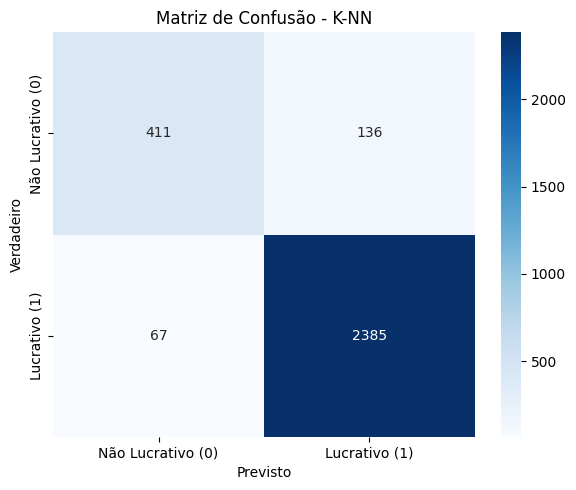


üîç Executando GridSearch para: SVM
Melhores Par√¢metros: {'C': 1, 'kernel': 'rbf'}
Acur√°cia : 0.9373 | Precis√£o : 0.9506 | Recall : 0.9739 | F1-Score : 0.9621


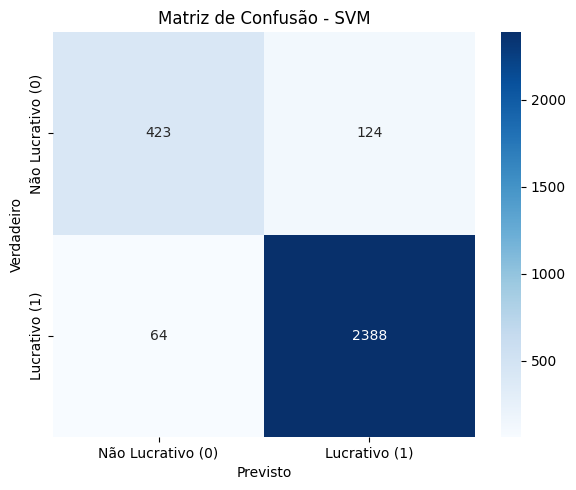


üîç Executando GridSearch para: √Årvore de Decis√£o
Melhores Par√¢metros: {'max_depth': 5, 'min_samples_leaf': 5}
Acur√°cia : 0.9450 | Precis√£o : 0.9448 | Recall : 0.9906 | F1-Score : 0.9672


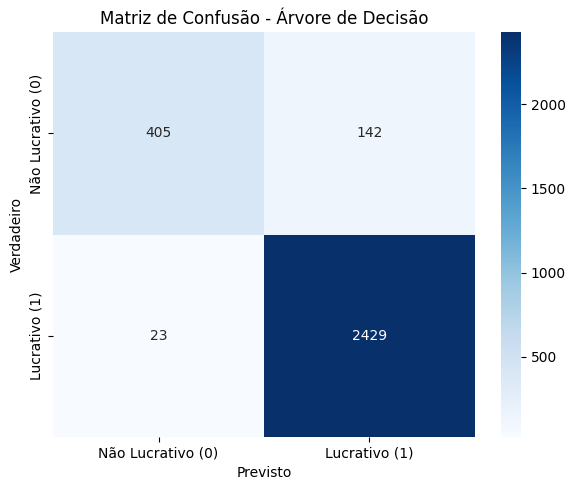


üîç Executando GridSearch para: Random Forest
Melhores Par√¢metros: {'max_depth': 20, 'min_samples_leaf': 1}
Acur√°cia : 0.9436 | Precis√£o : 0.9412 | Recall : 0.9931 | F1-Score : 0.9665


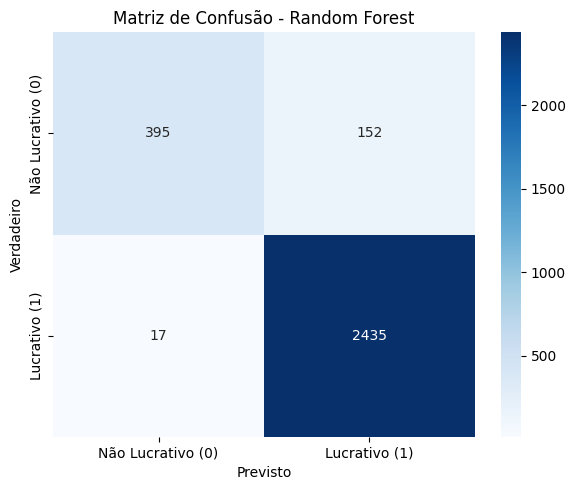


üîç Avalia√ß√£o dos Modelos de Regress√£o (com GridSearch)

Executando GridSearch para: SVR
Melhores Par√¢metros: {'reg__C': 100, 'reg__kernel': 'linear'}
SVR - RMSE: 230.67

Executando GridSearch para: √Årvore Regressora
Melhores Par√¢metros: {'max_depth': 10, 'min_samples_leaf': 5}
√Årvore Regressora - RMSE: 184.57

Executando GridSearch para: Random Forest
Melhores Par√¢metros: {'max_depth': 10, 'min_samples_leaf': 1}
Random Forest - RMSE: 204.88


In [ ]:
# Utilizei o Grid Search para automatizar a escolha dos melhores hiperpar√¢metros,
# testando combina√ß√µes poss√≠veis com valida√ß√£o cruzada. Os valores foram definidos com base
# na l√≥gica de cada modelo e no conte√∫do estudado. Por exemplo, usei valores √≠mpares para o K no KNN, testei
# diferentes kernels e valores de C no SVM/SVR para evitar overfitting, e ajustei profundidade e folhas m√≠nimas nas √°rvores
#para controlar a complexidade. J√° os modelos lineares foram usados com os par√¢metros padr√£o recomendados.

from sklearn.model_selection import GridSearchCV

# Define os modelos de classifica√ß√£o e os hiperpar√¢metros que ser√£o testados
parametros_classificacao = {
    "K-NN": {
        "modelo": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7, 9]}
    },
    "SVM": {
        "modelo": SVC(random_state=42),
        "params": {"C": [1, 10, 100], "kernel": ['linear', 'rbf', 'poly']}
    },
    "√Årvore de Decis√£o": {
        "modelo": DecisionTreeClassifier(random_state=42),
        "params": {"max_depth": [3, 5, 10], "min_samples_leaf": [1, 5, 10]}
    },
    "Random Forest": {
        "modelo": RandomForestClassifier(random_state=42),
        "params": {"max_depth": [5, 10, 20], "min_samples_leaf": [1, 5]}
    }
}

# Dicion√°rio para armazenar os resultados de cada modelo
resultados_grid_classificacao = {}

# Loop para aplicar o GridSearch em cada modelo
for nome, config in parametros_classificacao.items():
    print(f"\nüîç Executando GridSearch para: {nome}")

    # Executa o GridSearch com valida√ß√£o cruzada
    grid = GridSearchCV(config["modelo"], config["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_processed, y_clf_train)

    # Seleciona o melhor modelo encontrado
    melhor_modelo = grid.best_estimator_
    y_pred = melhor_modelo.predict(X_test_processed)

    # Calcula as m√©tricas de avalia√ß√£o
    acc = accuracy_score(y_clf_test, y_pred)
    prec = precision_score(y_clf_test, y_pred)
    rec = recall_score(y_clf_test, y_pred)
    f1 = f1_score(y_clf_test, y_pred)
    cm = confusion_matrix(y_clf_test, y_pred)

    # Salva os resultados no dicion√°rio
    resultados_grid_classificacao[nome] = {
        "Melhores Par√¢metros": grid.best_params_,
        "Acur√°cia": acc,
        "Precis√£o": prec,
        "Recall": rec,
        "F1-Score": f1
    }

    print("Melhores Par√¢metros:", grid.best_params_)
    print(f"Acur√°cia : {acc:.4f} | Precis√£o : {prec:.4f} | Recall : {rec:.4f} | F1-Score : {f1:.4f}")

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confus√£o - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()
